In [1]:
import matplotlib.pyplot as plt
import os
import tensorflow as tf
import numpy as np

In [2]:
# 데이터 불러오기
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
## 데이터를 (배치사이즈 x 28 x 28 x 1)로 이미지를 변환해줌. -> 그레이스케일이므로 채널은 1
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [4]:
## 정답을 바이너리화 함.
Y_train = tf.keras.utils.to_categorical(Y_train)
Y_test = tf.keras.utils.to_categorical(Y_test)

In [7]:
input_Layer = tf.keras.layers.Input(shape=(28,28,1))
x= tf.keras.layers.Conv2D(32,(3,3), strides=1, activation=None)(input_Layer)
x= tf.keras.layers.MaxPool2D((2,2))(x)
x= tf.keras.layers.Conv2D(64,(3,3), strides=1, activation=None)(x)
x= tf.keras.layers.MaxPool2D((2,2))(x)
x= tf.keras.layers.Flatten()(x)
x= tf.keras.layers.Dense(512, activation='relu')(x)
Out_Layer= tf.keras.layers.Dense(10, activation='softmax')(x)

model = tf.keras.Model(inputs = [input_Layer], outputs = [Out_Layer])
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               8197

In [12]:
loss= tf.keras.losses.categorical_crossentropy
optimizer= tf.keras.optimizers.RMSprop(lr = 0.0001)
metrics= tf.keras.metrics.categorical_accuracy

model.compile(loss=loss, optimizer=optimizer, metrics=[metrics])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [13]:
modelpath="./CNN_Fasion_MNIST_model/{epoch:02d}-{val_loss:.4f}.hdf5"
callback_list=[tf.keras.callbacks.ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True),
               tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)]

In [14]:
history = model.fit(X_train, Y_train, validation_split=0.2, epochs=5, batch_size=200, verbose=1, callbacks=callback_list)

Epoch 1/5
240/240 [==============================] - 39s 159ms/step - loss: 3.1670 - categorical_accuracy: 0.7208 - val_loss: 1.1581 - val_categorical_accuracy: 0.7903

Epoch 00001: val_loss improved from inf to 1.15805, saving model to ./CNN_Fasion_MNIST_model/01-1.1581.hdf5
Epoch 2/5
240/240 [==============================] - 37s 155ms/step - loss: 0.9094 - categorical_accuracy: 0.8194 - val_loss: 0.8418 - val_categorical_accuracy: 0.8069

Epoch 00002: val_loss improved from 1.15805 to 0.84177, saving model to ./CNN_Fasion_MNIST_model/02-0.8418.hdf5
Epoch 3/5
240/240 [==============================] - 37s 154ms/step - loss: 0.5369 - categorical_accuracy: 0.8561 - val_loss: 0.5348 - val_categorical_accuracy: 0.8563

Epoch 00003: val_loss improved from 0.84177 to 0.53477, saving model to ./CNN_Fasion_MNIST_model/03-0.5348.hdf5
Epoch 4/5
240/240 [==============================] - 37s 155ms/step - loss: 0.3772 - categorical_accuracy: 0.8828 - val_loss: 0.4792 - val_categorical_accuracy: 

In [15]:
# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

313/313 [==============================] - 3s 10ms/step - loss: 0.4395 - categorical_accuracy: 0.8697

 Test Accuracy: 0.8697


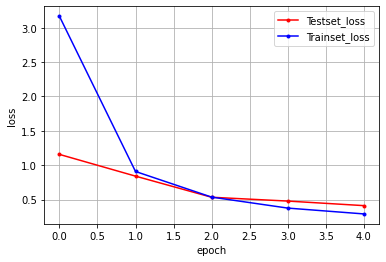

In [16]:
# 테스트 셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

# 그래프로 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()